In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from math import sqrt
from math import ceil
from math import comb
from scipy.stats import binom
from sklearn.metrics import r2_score 

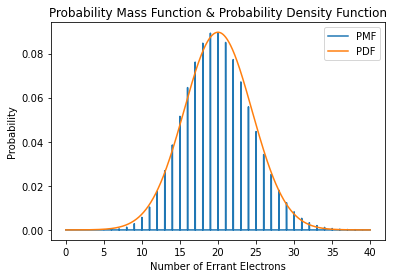

In [3]:
# QUESTION 5A

p = 0.01 # probability of generating errant electron
n = 2000 # sample size

std = sqrt(n * p * (1 - p)) # calculate standard deviation
mean = p * n # calculate mean, which is equal to expected value

x = np.arange(0, 40, 0.01) # generate given range of errant electrons

y1 = stats.binom.pmf(x, n, p) # create PMF function
y2 = stats.norm.pdf(x, mean, std) # create PDF function

list_x = np.linspace(1, 40, 40) # create a discrete list of x values

plt.plot(x, y1, label='PMF') # plot PMF
plt.plot(x, y2, label='PDF') # plot PDF

# create labels, legend, and draw plots
plt.xlabel('Number of Errant Electrons') 
plt.ylabel('Probability')
plt.title('Probability Mass Function & Probability Density Function')
plt.legend()
plt.show()

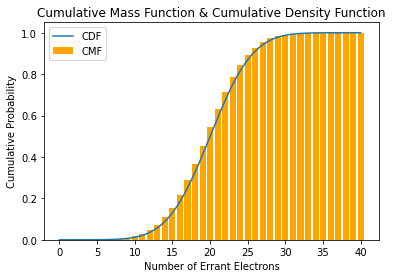

In [4]:
# QUESTION 5A CONT.

y3 = stats.norm.cdf(x, 20, std) # create CDF function

plt.plot(x, y3, label='CDF') # plot CDF

# initialize helper values
j = 0
list_cum = []
cum = 0

while j in range(0, 40): # use while loop and PDF to create a list of CDF values
    j = j + 1
    cum = cum + stats.norm.pdf(j, mean, std)
    list_cum.append(cum)   
    
plt.bar(list_x, list_cum, label='CMF', color='orange') # plot CMF

# create labels, legend, and draw plots
plt.xlabel('Number of Errant Electrons')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Mass Function & Cumulative Density Function')
plt.legend()
plt.show()

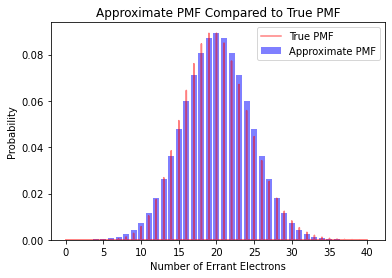

In [5]:
# QUESTION 5B

approx = [] # initialize helper variables
m = 0

while m in range(0, 40): # use while loop and CDF to create a list of PMF
    m = m + 1
    prob = stats.norm.cdf(m + 0.5, mean, std) - stats.norm.cdf(m - 0.5, mean, std)
    approx.append(prob)
    
plt.bar(list_x, approx, label='Approximate PMF', color='blue', alpha=0.5) # plot approximate PMF
plt.plot(x, y1, label='True PMF', color='red', alpha=0.5) # plot true PMF

# create labels, legend, and draw plots
plt.xlabel('Number of Errant Electrons') 
plt.ylabel('Probability')
plt.title('Approximate PMF Compared to True PMF')
plt.legend()
plt.show()

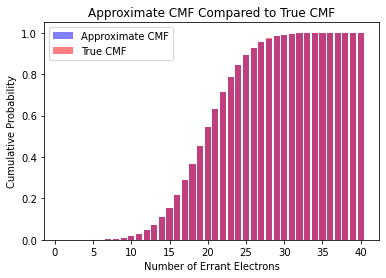

The true and approximate CMFs overlap perfectly, leading to the blended color above.


In [6]:
# QUESTION 5B Cont.

approx_cum = [] # initialize helper variables
l = 0
prob_cum = 0

while l in range(0, 40): # use while loop and continuity correction with CDF to create a list of CMF
    l = l + 1
    prob_cum = prob_cum + (stats.norm.cdf(l + 0.5, mean, std) - stats.norm.cdf(l - 0.5, mean, std))
    approx_cum.append(prob_cum)
    
plt.bar(list_x, approx_cum, label='Approximate CMF', color='blue', alpha=0.5) # plot approximate CMF
plt.bar(list_x, list_cum, label='True CMF', color='red', alpha=0.5) # plot true CMF

# create labels, legend, and draw plots
plt.xlabel('Number of Errant Electrons')
plt.ylabel('Cumulative Probability')
plt.title('Approximate CMF Compared to True CMF')
plt.legend()
plt.show()

print('The true and approximate CMFs overlap perfectly, leading to the blended color above.') # explanation

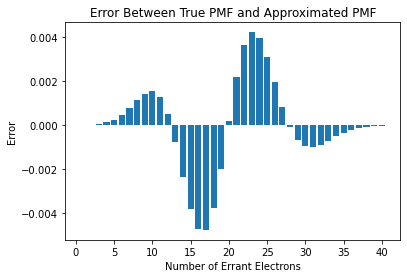

R Squared Value:  0.995744781825986
R Squared Value (rounded):  1


In [7]:
# QUESTION 5C

pmf_error = [] # initialize helper variable

y_approx = stats.binom.pmf(list_x, n, p) # create list of approximate PMF values

zip_object = zip(approx, y_approx) # 'zips' lists together and subtract every true PMF from the approximate PMF
for approx_i, y_approx_i in zip_object:
    pmf_error.append(approx_i - y_approx_i)
    
plt.bar(list_x, pmf_error) # plot error between true and approximate PMF

# create labels and draw plots
plt.xlabel('Number of Errant Electrons')
plt.ylabel('Error')
plt.title('Error Between True PMF and Approximated PMF')
plt.show()

R_square_pmf = r2_score(approx, y_approx) # calculate R^2 between approximate and true PMF
print('R Squared Value: ', R_square_pmf) # print exact R^2
print('R Squared Value (rounded): ', ceil(R_square_pmf)) # print rounded R^2

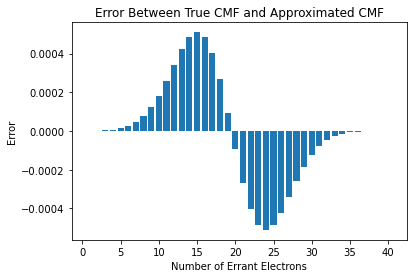

R Squared Value:  0.9999996260031503
R Squared Value (rounded):  1


In [8]:
# QUESTION 5C Cont.

cmf_error = [] # initialize helper variables

zip_object = zip(approx_cum, list_cum) # 'zip' lists together and subtract every true CMF value from the approximate CMF
for approx_cum_i, list_cum_i in zip_object:
    cmf_error.append(approx_cum_i - list_cum_i)

plt.bar(list_x, cmf_error) # plot error between true and approximate CMF

# create labels, legend, and draw plots
plt.xlabel('Number of Errant Electrons')
plt.ylabel('Error')
plt.title('Error Between True CMF and Approximated CMF')
plt.show()

R_square_cmf = r2_score(approx_cum, list_cum) # calculate R^2 between approximate and true CMF
print('R Squared Value: ', R_square_cmf) # print exact R^2 value
print('R Squared Value (rounded): ', ceil(R_square_cmf)) # print rounded R^2 value

In [9]:
# QUESTION 5D

list_p = np.linspace(0.0025, 0.01, 5) # create list of evenly spaced probability values

# initialize helper variables
m = 0
list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []

# BELOW: run while loops and create lists of approximate PMF's with varying probabilities

while m in range(0, 40):
    m = m + 1
    prob_1 = stats.norm.cdf(m + 0.5, 2000 * 0.0025, sqrt(2000 * 0.0025 * (1 - 0.0025))) - stats.norm.cdf(m - 0.5, 2000 * 0.0025, sqrt(2000 * 0.0025 * (1 - 0.0025)))
    list_1.append(prob_1)
    
q = 0

while q in range(0, 40):
    q = q + 1
    prob_2 = stats.norm.cdf(q + 0.5, 2000 * 0.004375, sqrt(2000 * 0.004375 * (1 - 0.004375))) - stats.norm.cdf(q - 0.5, 2000 * 0.004375, sqrt(2000 * 0.004375 * (1 - 0.004375)))
    list_2.append(prob_2)

e = 0

while e in range(0, 40):
    e = e + 1
    prob_3 = stats.norm.cdf(e + 0.5, 2000 * 0.00625, sqrt(2000 * 0.00625 * (1 - 0.00625))) - stats.norm.cdf(e - 0.5, 2000 * 0.00625, sqrt(2000 * 0.00625 * (1 - 0.00625)))
    list_3.append(prob_3)

b = 0

while b in range(0, 40):
    b = b + 1
    prob_4 = stats.norm.cdf(b + 0.5, 2000 * 0.008125, sqrt(2000 * 0.008125 * (1 - 0.008125))) - stats.norm.cdf(b - 0.5, 2000 * 0.008125, sqrt(2000 * 0.008125 * (1 - 0.008125)))
    list_4.append(prob_4)

o = 0

while o in range(0, 40):
    o = o + 1
    prob_5 = stats.norm.cdf(o + 0.5, 2000 * 0.01, sqrt(2000 * 0.01 * (1 - 0.01))) - stats.norm.cdf(o - 0.5, 2000 * 0.01, sqrt(2000 * 0.01 * (1 - 0.01)))
    list_5.append(prob_5)

In [10]:
# QUESTION 5D Cont.

# initialize helper variables
pmf_error_1 = []
pmf_error_2 = []
pmf_error_3 = []
pmf_error_4 = []
pmf_error_5 = []


# find true PMF values for each probability value
y_approx_1 = stats.binom.pmf(list_x, n, 0.0025)
y_approx_2 = stats.binom.pmf(list_x, n, 0.004375)
y_approx_3 = stats.binom.pmf(list_x, n, 0.00625)
y_approx_4 = stats.binom.pmf(list_x, n, 0.008125)
y_approx_5 = stats.binom.pmf(list_x, n, 0.01)

# 'zip' lists together
zip_object_1 = zip(list_1, y_approx_1)
zip_object_2 = zip(list_2, y_approx_2)
zip_object_3 = zip(list_3, y_approx_3)
zip_object_4 = zip(list_4, y_approx_4)
zip_object_5 = zip(list_5, y_approx_5)

# BELOW: for each set of approximate and true value lists, subtract true value from approximate

for list_1_i, y_approx_1_i in zip_object_1:
    pmf_error_1.append(list_1_i - y_approx_1_i)
    
for list_2_i, y_approx_2_i in zip_object_2:
    pmf_error_2.append(list_2_i - y_approx_2_i)
    
for list_3_i, y_approx_3_i in zip_object_3:
    pmf_error_3.append(list_3_i - y_approx_3_i)
    
for list_4_i, y_approx_4_i in zip_object_4:
    pmf_error_4.append(list_4_i - y_approx_4_i)
    
for list_5_i, y_approx_5_i in zip_object_5:
    pmf_error_5.append(list_5_i - y_approx_5_i)

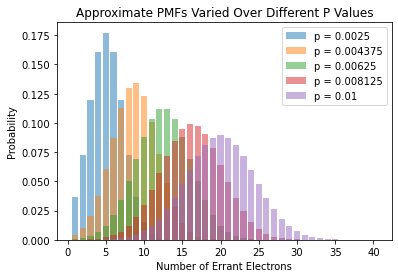

In [11]:
# QUESTION 5D Cont.

# plot approximate PMF's for each probability value

plt.bar(list_x, list_1, label='p = 0.0025', alpha=0.5)
plt.bar(list_x, list_2, label='p = 0.004375', alpha=0.5)
plt.bar(list_x, list_3, label='p = 0.00625', alpha=0.5)
plt.bar(list_x, list_4, label='p = 0.008125', alpha=0.5)
plt.bar(list_x, list_5, label='p = 0.01', alpha=0.5)

# create labels, legend, and draw plots
plt.xlabel('Number of Errant Electrons') 
plt.ylabel('Probability')
plt.title('Approximate PMFs Varied Over Different P Values')
plt.legend()
plt.show()

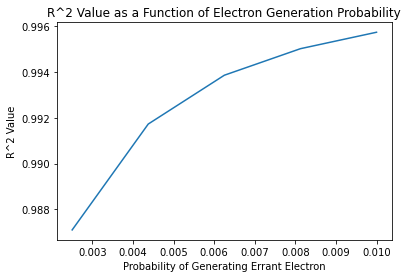

In [12]:
# QUESTION 5D Cont.

# calculate R^2 value between each true and approximate PMF for each probability value

R_square_pmf_1 = r2_score(list_1, y_approx_1)
R_square_pmf_2 = r2_score(list_2, y_approx_2)
R_square_pmf_3 = r2_score(list_3, y_approx_3)
R_square_pmf_4 = r2_score(list_4, y_approx_4)
R_square_pmf_5 = r2_score(list_5, y_approx_5)

list_r_squared = [R_square_pmf_1, R_square_pmf_2, R_square_pmf_3, R_square_pmf_4, R_square_pmf_5] # place R^2 values from above into list

plt.plot(list_p, list_r_squared) # plot R^2 values as a function of probabilities

# create labels, legend, and draw plots
plt.xlabel('Probability of Generating Errant Electron') 
plt.ylabel('R^2 Value')
plt.title('R^2 Value as a Function of Electron Generation Probability')
plt.show()

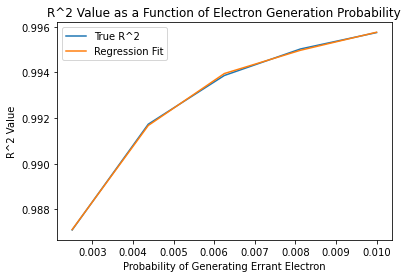

The cubic regression fits the model almost perfectly, with an R^2 of:  0.9997107059533206


In [13]:
# QUESTION 5E

# initialize helper variables for matrix calculations
x_vals_cubed = (list_p) * (list_p) * (list_p)
x_vals_squared = (list_p) * (list_p)
x_vals = (list_p)
y_vals = list_r_squared

# create matrix 
x_mat = np.vstack((np.ones(len(x_vals)), x_vals, x_vals_squared, x_vals_cubed)).T

# do matrix calculations to find coefficients
x_mat[0:5,]
beta_hat = np.linalg.inv(x_mat.T.dot(x_mat)).dot(x_mat.T).dot(y_vals)

# set equation for cubic regression line
y_line = beta_hat[0] + x_vals * beta_hat[1] + x_vals_squared * beta_hat[2] + x_vals_cubed * beta_hat[3]

plt.plot(list_p, list_r_squared, label='True R^2') # plot R^2 as a function of probability
plt.plot(list_p, y_line, label='Regression Fit') # plot regression line

# create labels, legend, and draw plots
plt.xlabel('Probability of Generating Errant Electron') 
plt.ylabel('R^2 Value')
plt.title('R^2 Value as a Function of Electron Generation Probability')
plt.legend()
plt.show()

R_square_final = r2_score(list_r_squared, y_line) # calculate R^2 between regression line and model
print('The cubic regression fits the model almost perfectly, with an R^2 of: ', R_square_final)

In [18]:
# QUESTION 5E Cont.

extrap = beta_hat[0] + 0.015 * beta_hat[1] + (0.015 ** 2) * beta_hat[2] + (0.015 ** 3) * beta_hat[3]

print('''The fit models R^2 vs. Probability well in the range of probabilities from 0.0025 to 0.01. 
However past 0.01, the fit predicts a R^2 above 1, which is not possible. 
For example, for a probability of 0.015 the fit models an R^2 of: ''', extrap)
print('')
print('This R^2 is not possible so the fit is not accurate at this probability value.')

The fit models R^2 vs. Probability well in the range of probabilities from 0.0025 to 0.01. 
However past 0.01, the fit predicts a R^2 above 1, which is not possible. 
For example, for a probability of 0.015 the fit models an R^2 of:  1.0045566468317195

This R^2 is not possible so the fit is not accurate at this probability value.
